Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [1]:
import pandas as pd
bank = pd.read_csv('../../../Downloads/bank_cleaned.csv')

In [2]:
bank.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [3]:
bank['response'].value_counts()

no     36202
yes     4639
Name: response, dtype: int64

In [4]:
bank['response_binary'].value_counts()

0    36202
1     4639
Name: response_binary, dtype: int64

In [5]:
bank.isnull().sum()

Unnamed: 0         0
age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [6]:
bank = bank.drop(['response','Unnamed: 0'],axis =1 )


In [7]:
y = bank['response_binary']
y.nunique()


2

In [8]:
# different values of y --- majority class 88%
y.value_counts(normalize=True)

0    0.886413
1    0.113587
Name: response_binary, dtype: float64

In [9]:
X = bank.drop('response_binary',axis=1)

In [10]:
bank.shape

(40841, 16)

In [ ]:
# preicion is worth calculating --as it i predict existing customer will say yes 
# for the term deposit which is my y variable & actually they do sign up for the term deposit then it is good for business.
#  for my case study i want my precision to be high.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train.shape, X_val.shape,X_test.shape
    

((26137, 15), (6535, 15), (8169, 15))

In [12]:
# Baseline model
# as precision is good for my model so I calculated precision
# precision score for the validation dataset

from sklearn.metrics import precision_score

# Using Sklearn DummyClassifier
from sklearn.dummy import DummyClassifier

# Fit the DummyClassifier
baseline = DummyClassifier(strategy='uniform')
baseline.fit(X_train, y_train)

# Make predictions on validation data
y_pred = baseline.predict(X_val)
precision_score(y_val, y_pred,average='binary')

0.12344139650872818

In [13]:
# precision score for the test dataset

from sklearn.metrics import precision_score

# Using Sklearn DummyClassifier
from sklearn.dummy import DummyClassifier

# Fit the DummyClassifier on training data
baseline = DummyClassifier(strategy='uniform')
baseline.fit(X_train, y_train)

# Make predictions on test data
y_pred1 = baseline.predict(X_test)
precision_score(y_test, y_pred1,average='binary')


0.11543194683731232

In [14]:
# accuracy score in random forest using One Hot encoder


import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
 
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

# Fit on train and score on val
pipeline.fit(X_train, y_train)

# Make predictions on validation data
y_pred = pipeline.predict(X_val)
precision_score(y_val, y_pred,average='binary')

/Users/anitasharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6437659033078881

In [16]:

import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


In [18]:

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.fit_transform(X_val) 

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
!pip install eli5

     |████████████████████████████████| 112kB 2.2MB/s eta 0:00:01
     |████████████████████████████████| 51kB 14.8MB/s eta 0:00:01
  Created wheel for tabulate: filename=tabulate-0.8.6-cp37-none-any.whl size=23274 sha256=1fad58390d7af051ef7c99287f16606c41802e737ce7f64e1d5db14a96496b8f
  Stored in directory: /Users/anitasharma/Library/Caches/pip/wheels/9c/9b/f4/eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate


In [21]:
import eli5
from eli5.sklearn import PermutationImportance

#1. Calculate permutation importances
permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [22]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

duration     0.036083
poutcome     0.008447
pdays        0.005172
month        0.004346
previous     0.003366
marital      0.001530
housing      0.001132
age          0.000673
day          0.000612
job          0.000459
default      0.000122
campaign     0.000061
loan        -0.000031
education   -0.000520
balance     -0.000826
dtype: float64

In [23]:
# 2. Display permutation importances (the nice way)
eli5.show_weights(
    permuter,
    top=None, #Shows all features
    feature_names=feature_names
)

Weight,Feature
0.0361 ± 0.0038,duration
0.0084 ± 0.0013,poutcome
0.0052 ± 0.0027,pdays
0.0043 ± 0.0030,month
0.0034 ± 0.0011,previous
0.0015 ± 0.0013,marital
0.0011 ± 0.0014,housing
0.0007 ± 0.0019,age
0.0006 ± 0.0024,day
0.0005 ± 0.0012,job


In [24]:
minimum_importance = 0 

mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask] # Subsetting with just the important features
X_train = X_train[features]

In [25]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy: {score_with}')


Validation Accuracy: 0.9089517980107116


In [27]:
!pip install xgboost

     |████████████████████████████████| 686kB 1.9MB/s eta 0:00:01
  Created wheel for xgboost: filename=xgboost-0.90-cp37-cp37m-macosx_10_9_x86_64.whl size=1696839 sha256=c87efedb30979a75eab34858815271b9678f06eaa14eb5e5aa7772c3f84f301b
  Stored in directory: /Users/anitasharma/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [28]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'default', 'housing',
                                      'month', 'poutcome'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': technician        1
retired           2
management        3
housemaid         4
services          5
other             6
blue-collar       7
admin.            8
unemployed        9
entrepreneur     10
studen...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1

In [29]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.9066564651874521


In [36]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

X_train_encoded.shape 

(26137, 12)

In [39]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)


model = XGBClassifier(
    n_estimators=500, # <= [up to] 500 trees (but depends on early stopping)
    max_depth = 3, # Deeper Trees for high cardinality categories
    learning_rate = 0.5, 
    n_jobs=-1,
)

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50) # Stop if the score hasn't imporved in the last 50 rounds)

[0]	validation_0-error:0.099897	validation_1-error:0.099005
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.102039	validation_1-error:0.10023
[2]	validation_0-error:0.099782	validation_1-error:0.098393
[3]	validation_0-error:0.100891	validation_1-error:0.097934
[4]	validation_0-error:0.097372	validation_1-error:0.09518
[5]	validation_0-error:0.096492	validation_1-error:0.094262
[6]	validation_0-error:0.096071	validation_1-error:0.092731
[7]	validation_0-error:0.095573	validation_1-error:0.092425
[8]	validation_0-error:0.093622	validation_1-error:0.090742
[9]	validation_0-error:0.093163	validation_1-error:0.089365
[10]	validation_0-error:0.092551	validation_1-error:0.089671
[11]	validation_0-error:0.092972	validation_1-error:0.090589
[12]	validation_0-error:0.092627	validation_1-error:0.088753
[13]	validation_0-error:0.092742	validation_1-error:0.0901

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

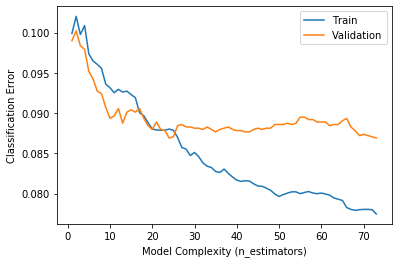

In [41]:
results = model.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label="Train")
plt.plot(epoch, val_error, label="Validation")
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.18, 0.22)) #Turn this on and off to see the full plt 
plt.legend();